# Hw 5.2

Bayesian inference of binomial proportions. Poldrack (2006) published an influential
attack on the practice of ”reverse inference” in fMRI studies, i.e. inferring that a cognitive
process was engaged on the basis of activation in some area. For instance, if Broca’s area was
found to be activated using standard fMRI statistical-contrast techniques, researchers might
infer that the subjects were using language. In a search of the literature, Poldrack found that
Broca’s area was reported activated in 103 out of 869 fMRI contrasts involving engagement
of language, but this area was also active in 199 out of 2353 contrasts not involving language.

In [1]:
import numpy as np
import math
import numpy.linalg as la
import scipy.io as sio
import scipy.stats as sts
from scipy.stats import poisson
from os.path import dirname, join as pjoin
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

## Part a)

Assume that the conditional probability of activation given language, as well as that of
activation given no language, each follow a Bernoulli distribution (i.e., like coin-flipping),
with parameters xl and xnl. Compute the likelihoods of these parameters, given Poldrack’s
observed frequencies of activation. Compute these functions at the values x=[0:.001:1] and plot them as a bar chart.

<BarContainer object of 1000 artists>

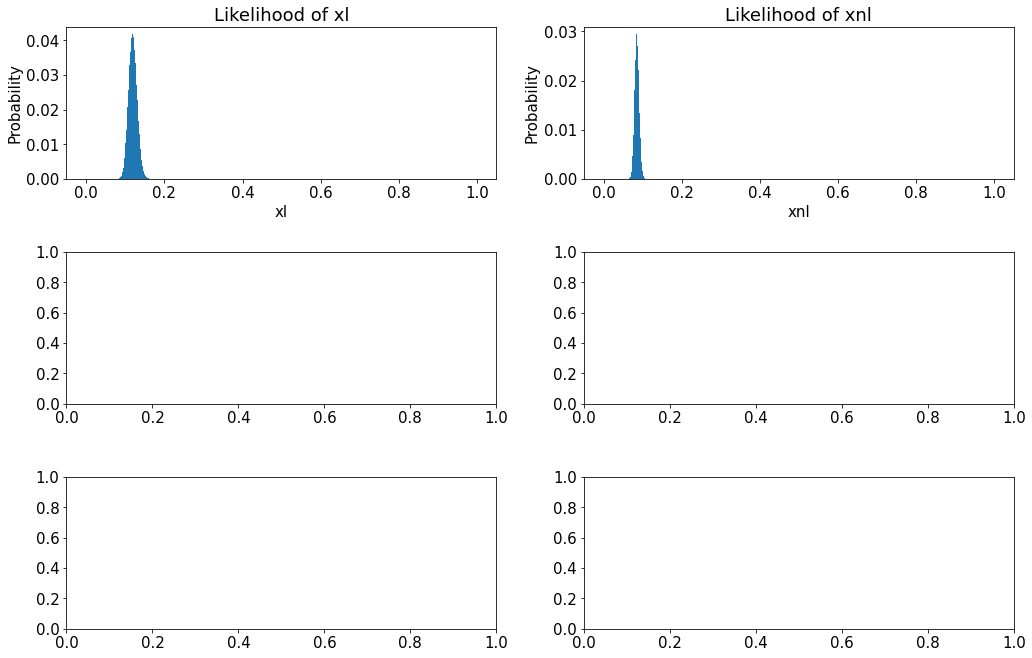

In [2]:
n = 869
k = 103
n0 = 2353
k0 = 199
step = 0.001
x = np.arange(0,1,step)
L_xl = math.comb(n,k)*(x)**k*(1-x)**(n-k)
L_xl = L_xl.astype(float)
L_xnl = math.comb(n0,k0)*(x)**k0*(1-x)**(n0-k0)
L_xnl = L_xnl.astype(float)

plt.rc('font', size=15)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.tight_layout(pad = 3.0)


axs[0,0].set(title = 'Likelihood of xl',xlabel = 'xl',  ylabel = 'Probability')
axs[0,0].bar(x, L_xl, step)
axs[0,1].set(title = 'Likelihood of xnl',xlabel = 'xnl', ylabel = 'Probability')
axs[0,1].bar(x, L_xnl, step)

## Part b)

Find the value of x that maximizes each discretized likelihood function. Compare these to the exact maximum likelihood estimates given by the formula for the ML estimator of a Bernoulli probability.

The formula for the Max Likelihood estimator, $\hat{\theta}$, of a Bernoulli probability is $k$, the true cases, divided by the total number of cases, $n$. Therefore, 
$$\hat{\theta}_{xl} = \frac{k}{n} = \frac{103}{869} = 0.1185$$ and 
$$\hat{\theta}_{xnl} = \frac{k_0}{n_0} = \frac{199}{2353} = 0.0845$$

which are almost exactly the same as the ones calculated by the discretized likelihood function.

xl_max = 0.11900000000000001
xnl_max = 0.085


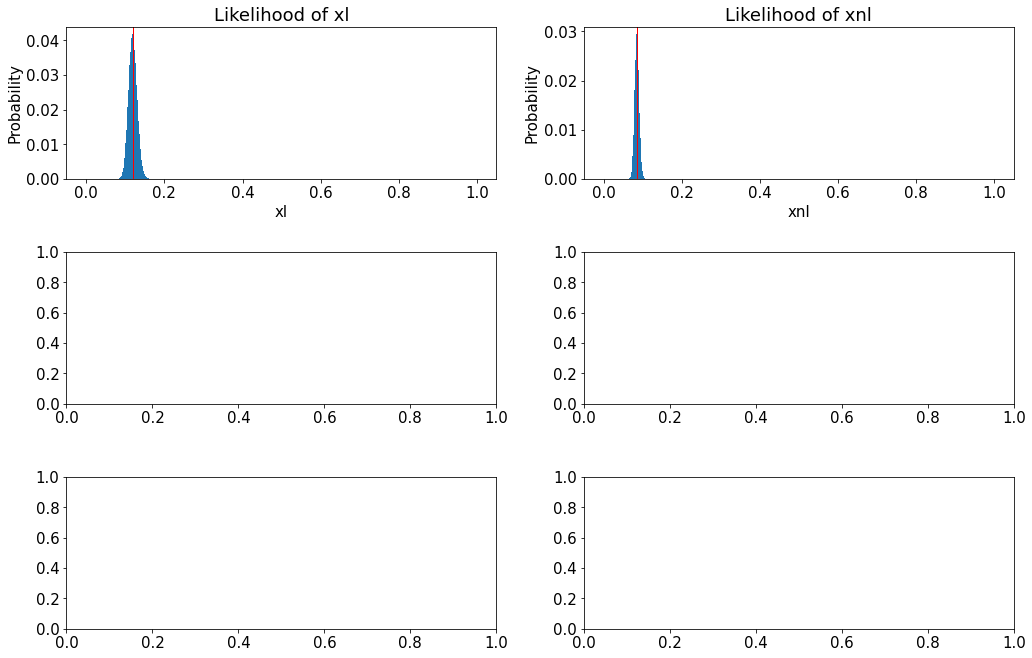

In [3]:
nMax = np.argmax(L_xl)
xl_max = x[nMax]
axs[0,0].axvline(xl_max, color = 'r', linewidth = '1')
nMax = np.argmax(L_xnl)
xnl_max = x[nMax]
axs[0,1].axvline(xnl_max, color = 'r', linewidth = '1')
print(f'xl_max = {xl_max}')
print(f'xnl_max = {xnl_max}')
fig

## Part c)

Using the likelihood functions computed for discrete x, compute and plot the discrete
posterior distributions P(x | data) and the associated cumulative distributions P(X ≤ x |
data) for both processes. For this, assume a uniform prior P(x) ∝ 1 and note that it will
be necessary to compute (rather than ignore) the normalizing constant for Bayes’ rule. Use
the cumulative distributions to compute (discrete approximations to) upper and lower 95%
confidence bounds on each proportion.

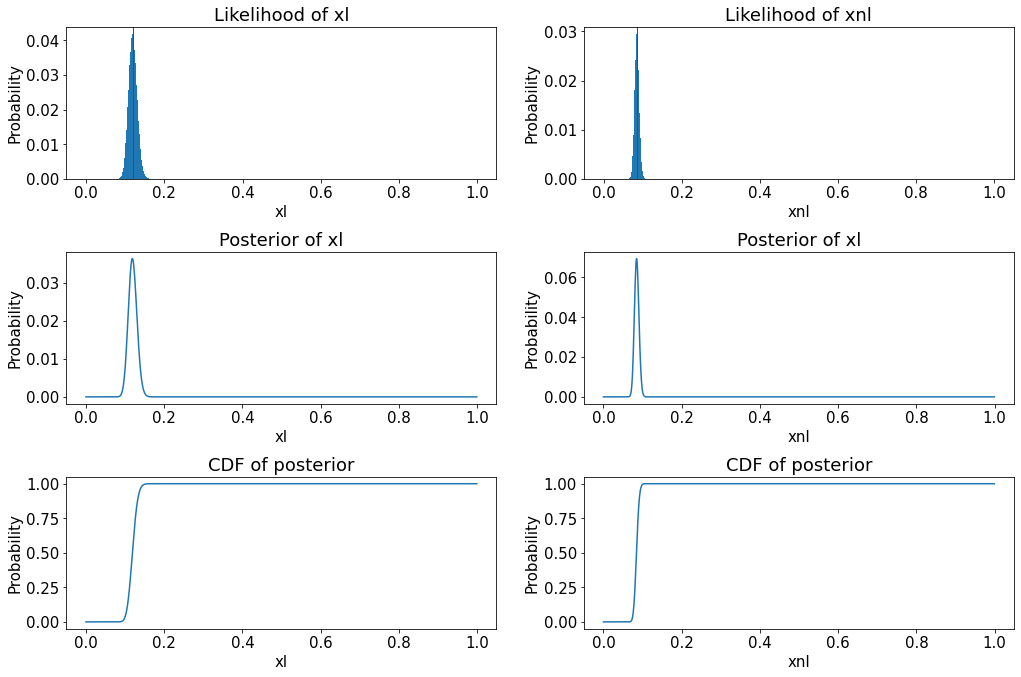

In [4]:
post_xl = L_xl/np.sum(L_xl)
axs[1,0].plot(x, post_xl)
axs[1,0].set(title = 'Posterior of xl',xlabel = 'xl', ylabel = 'Probability')
cdf_xl = np.cumsum(post_xl)
axs[2,0].plot(x, cdf_xl)
axs[2,0].set(title = 'CDF of posterior',xlabel = 'xl', ylabel = 'Probability')

post_xnl = L_xnl/np.sum(L_xnl)
axs[1,1].plot(x, post_xnl)
axs[1,1].set(title = 'Posterior of xl',xlabel = 'xnl', ylabel = 'Probability')
cdf_xnl = np.cumsum(post_xnl)
axs[2,1].plot(x, cdf_xnl)
axs[2,1].set(title = 'CDF of posterior',xlabel = 'xnl', ylabel = 'Probability')

fig


Lower 95% confidence bound of posterior of xl = 0.099
Upper 95% confidence bound of posterior of xl = 0.14200000000000002
Lower 95% confidence bound of posterior of xnl = 0.074
Upper 95% confidence bound of posterior of xnl = 0.096


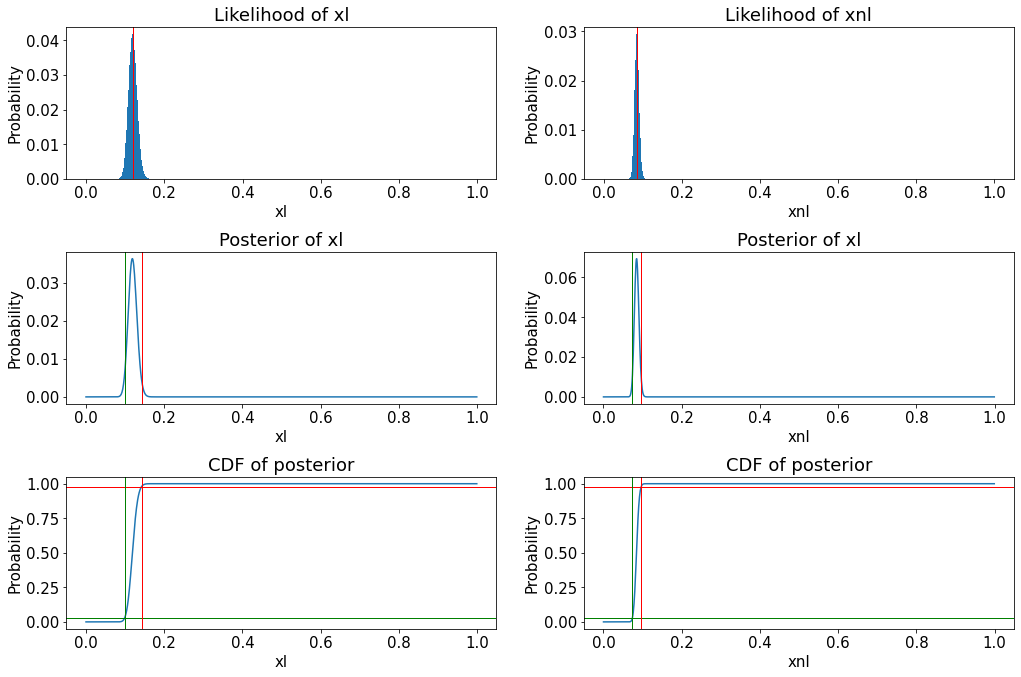

In [5]:
con_interval = 0.95
p = (1-con_interval)/2

qi1 = next(q[0] for q in enumerate(cdf_xl) if q[1] >= p)
qi2 = next(q[0] for q in enumerate(cdf_xl) if q[1] >= con_interval+p)

post_xl_q1 = x[qi1]
post_xl_q2 = x[qi2]
print(f'Lower 95% confidence bound of posterior of xl = {post_xl_q1}')
print(f'Upper 95% confidence bound of posterior of xl = {post_xl_q2}')
axs[1,0].axvline(post_xl_q1, color = 'g', linewidth = '1')
axs[1,0].axvline(post_xl_q2, color = 'r', linewidth = '1')

axs[2,0].axhline(y=cdf_xl[qi1], color = 'g', linewidth = '1')
axs[2,0].axhline(y=cdf_xl[qi2], color = 'r', linewidth = '1')

axs[2,0].axvline(x[qi1], color = 'g', linewidth = '1')
axs[2,0].axvline(x[qi2], color = 'r', linewidth = '1')

qi1 = next(q[0] for q in enumerate(cdf_xnl) if q[1] >= p)
qi2 = next(q[0] for q in enumerate(cdf_xnl) if q[1] >= con_interval+p)

post_xnl_q1 = x[qi1]
post_xnl_q2 = x[qi2]
print(f'Lower 95% confidence bound of posterior of xnl = {post_xnl_q1}')
print(f'Upper 95% confidence bound of posterior of xnl = {post_xnl_q2}')
axs[1,1].axvline(post_xnl_q1, color = 'g', linewidth = '1')
axs[1,1].axvline(post_xnl_q2, color = 'r', linewidth = '1')

axs[2,1].axhline(y=cdf_xnl[qi1], color = 'g', linewidth = '1')
axs[2,1].axhline(y=cdf_xnl[qi2], color = 'r', linewidth = '1')

axs[2,1].axvline(x[qi1], color = 'g', linewidth = '1')
axs[2,1].axvline(x[qi2], color = 'r', linewidth = '1')

fig

## Part d)

Are these frequencies different from one another? Consider the joint posterior distribution
over xl and xnl, the Bernoulli probability parameters for the language and non-language
contrasts. Given that these two frequencies are independent, the (discrete) joint distribution
is given by the outer product of the two marginals. Plot it (with imagesc). Compute (by
summing the appropriate entries in the joint distribution) the posterior probabilities that
xl > xnl and, conversely, that xl ≤ xnl.

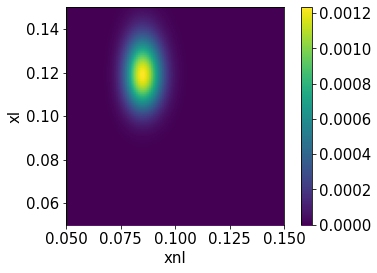

In [6]:
plt.figure()
j = np.outer(L_xl, L_xnl)
jf = np.flipud(j)
im = plt.imshow(jf, extent=[0,1,0,1])
plt.ylim(0.05,0.15)
plt.xlim(0.05,0.15)
plt.xlabel('xnl')
plt.ylabel('xl')
plt.colorbar(im)

85
0


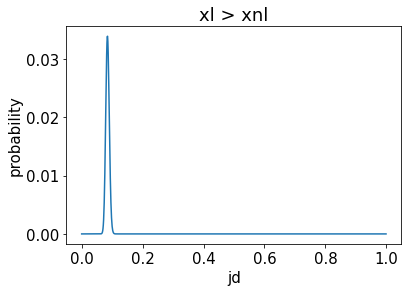

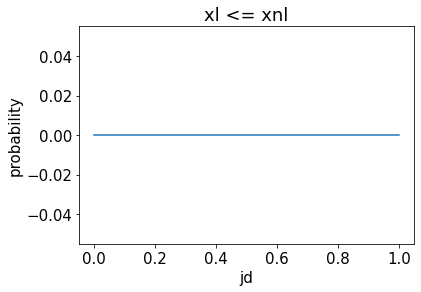

In [7]:
rows = np.shape(j)[0]
xl_jd = []
xnl_jd = []
for n in range(rows):
  xl_jd.append(sum(j[0:rows-n,n]))
  xnl_jd.append(sum(j[rows-(n+1),n:rows-1]))

plt.figure()
plt.plot(x, xl_jd)
plt.title('xl > xnl')
plt.xlabel('jd')
plt.ylabel('probability')
print(np.argmax(xl_jd))
plt.figure()
plt.plot(x, xnl_jd)
plt.title('xl <= xnl')
plt.xlabel('jd')
plt.ylabel('probability')
print(np.argmax(xnl_jd))

As you can see, the probability that $x_l > x_{nl}$ is greater than the probability that $x_l \le x_{nl}$, indicating that the frequency of activation in during language is greater than activation during not language.

## Part e)

Is this difference sufficient to support reverse inference? Compute the probability P(language |
activation). This is the probability that observing activation in Broca’s area implies en-
gagement of language processes. To do this use the estimates from part (b) as the rel-
evant conditional probabilities, and assuming the prior that a contrast engages language,
P(language) = 0.5. Poldrack’s critique said that we cannot simply conclude that activation
in a given area indicates that a cognitive process was engaged without computing the posterior
probability. Is this critique correct? To answer this, compare the Bayes factor (probability
of language vs. not language) after taking Poldrack’s data into account, compared to before
having done so.

By Bayesian inference formula,
$$P(lang|act) = \frac{P(act|lang) P(lang)}{P(act)}$$ and $$P(nlang|act) = \frac{P(act|nlang) P(nlang)}{P(act)}$$

The Bayes factor is, 
$$ K = \frac{P(lang|act)}{P(nlang|act)} = \frac{\frac{P(act|lang) P(lang)}{P(act)}}{\frac{P(act|nlang) P(nlang)}{P(act)}}$$

Since $P(lang) = 0.5$ then $P(nlang) = 0.5$ as well. Therefore, they both cancel, along with the $P(act)$ terms.

We are left with $$K = \frac{P(act|lang)}{P(act|nlang)} =  \frac{\frac{k}{n}}{\frac{k_0}{n_0}} = 1.4$$ 
as shown below. 

While this value is greater than the $K = 1$ without taking Poldrack's data into account, it is not a very decisive indicator of language activation, according to Harold Jeffrey's scale for interpreting $K$.

In [8]:
K = xl_max/xnl_max
print(K)

1.4
